In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv("tcs.csv")

In [3]:
# Create binary classification target: 1 if Close > Open, else 0
df['Target'] = (df['Tata Close'] > df['Tata Open']).astype(int)

In [4]:
# Feature selection
features = ['Tata Open', 'Tata High', 'Tata Low', 'Tata Volume']
X = df[features]
y = df['Target']


In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [6]:
# Train the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



C:\Users\megha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:38:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x600 with 0 Axes>

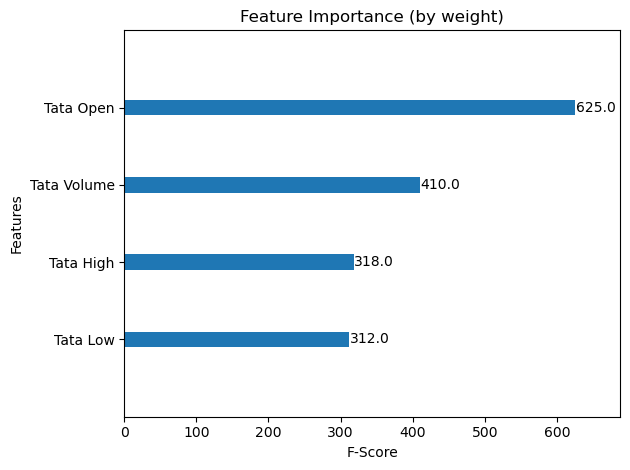

In [7]:
# Plot feature importance (based on model weights)
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(8, 6))
xgb.plot_importance(model, importance_type='weight', xlabel='F-Score', title='Feature Importance (by weight)', grid=False)
plt.tight_layout()
plt.show()


In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)





Confusion Matrix:
[[98 34]
 [42 74]]


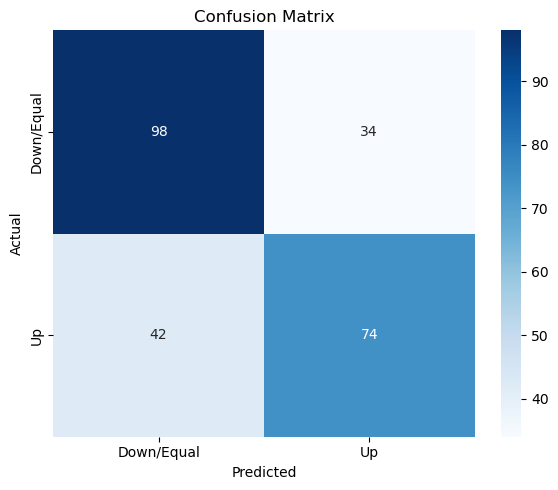

In [10]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down/Equal', 'Up'],
            yticklabels=['Down/Equal', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [11]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       132
           1       0.69      0.64      0.66       116

    accuracy                           0.69       248
   macro avg       0.69      0.69      0.69       248
weighted avg       0.69      0.69      0.69       248

